# **Supervised Learning - Project**

In this Project, we are going to perform a full unsupervised learning machine learning on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

***Imports***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering



# **Data Cleaning and EDA**

##### ***Loading Data***

In [2]:
data = pd.read_csv('Wholesale_Data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


##### ***Data Exploration***

In [4]:
data.shape

(440, 8)

***Insights:*** There are only 440 customers in this dataset containing 8 features

In [5]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

***Insights:*** There are no null values in the entire data. So there is no need for any cleaning of null values.

In [6]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

***Insights:*** All the features are integers. There is no need to change the data types as we can use this for our unsupervised learning later.

In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


***Insights:*** There seems to be no unrealistic data as there is no negative data points or extremely absurb high points. Although there is most likely outliers in the data set due to the skewed mean.

##### ***Heat Map***

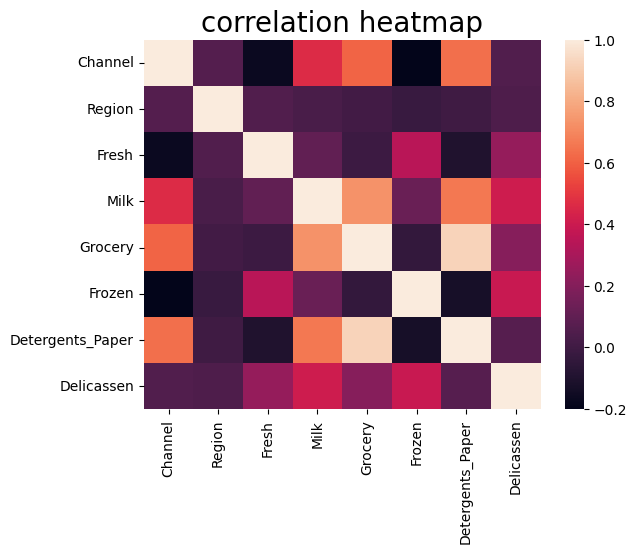

In [8]:
corr = data.corr()
sns.heatmap(corr)
plt.title('correlation heatmap', fontsize=20)

plt.savefig('images/heatmap.png')
plt.show()

***Insights:*** The heatmap indicates that there is a high correlation between the `Grocery` and `Detergents_Paper`. As well as a correlation between the `Milk` and `Detergents_Paper`, and `Milk` and `Grocery`. This can potentially show that customers may be buying these two categories together.

##### ***Pair Plot***

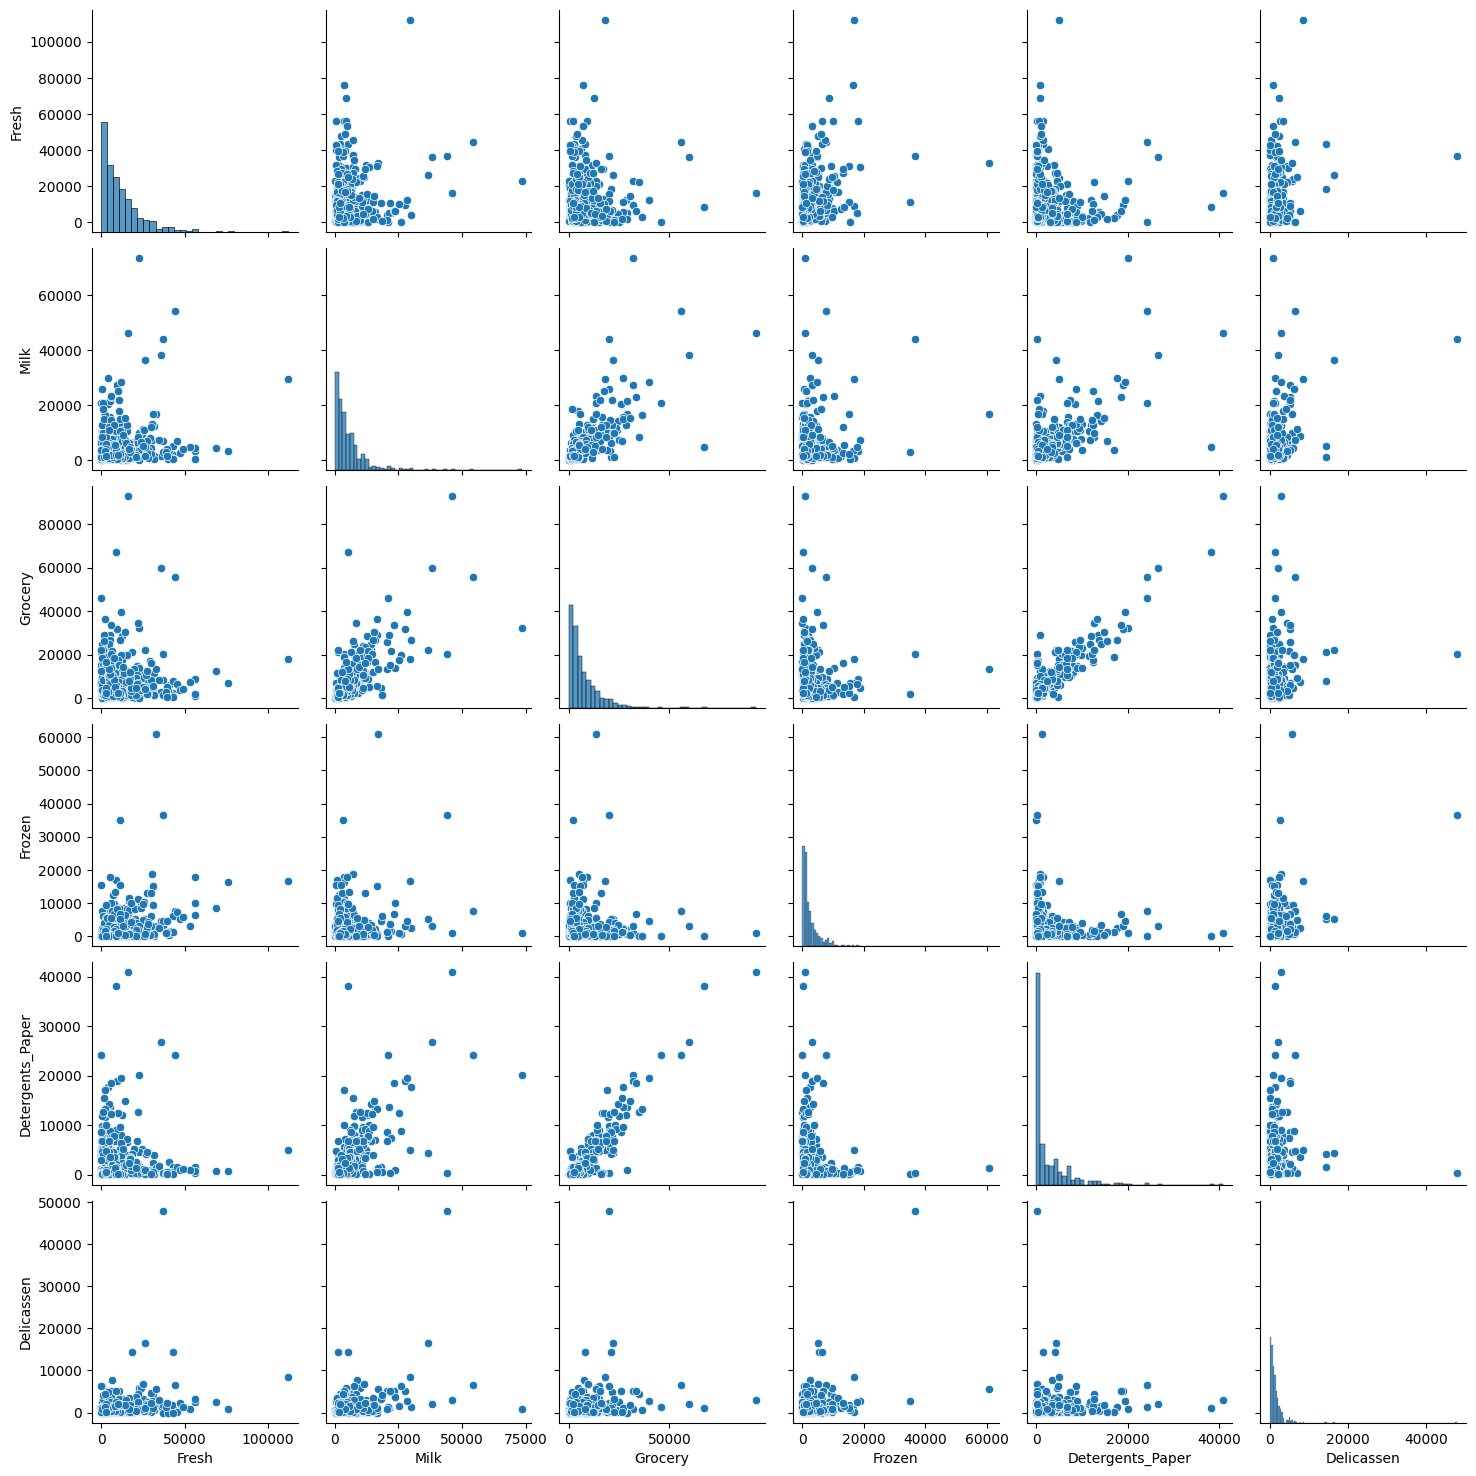

In [9]:
selected_features = data.iloc[:, 2:]
sns.pairplot(selected_features)

plt.savefig('images/pair_plot.png')
plt.show()

***Insights:*** This pair plot helps reinforce the same insights as the heat map, that there is indeed a high correlation between multiple of the features. It is also noted that all the features have a right skew, indicating that on a year round basis most customers spend a lower amount of money than a  higher amount. This also helps confirm there are heavy outliers in the data. 

##### ***Histogram***

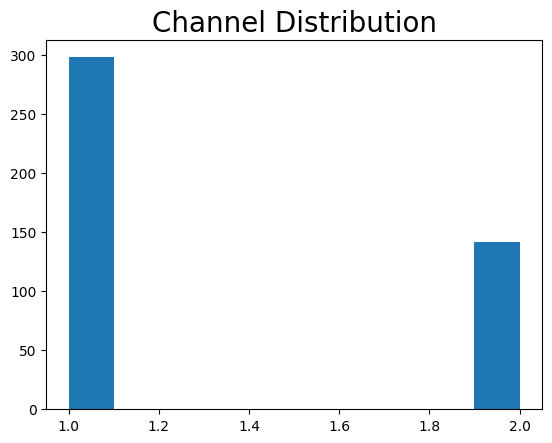

In [10]:
plt.hist(data['Channel'])
plt.title('Channel Distribution', fontsize=20)

plt.show
plt.savefig('images/channel_distribution.png')

***Insights:*** The histogram shows that more customers spend their money in horeca's compared to retail.

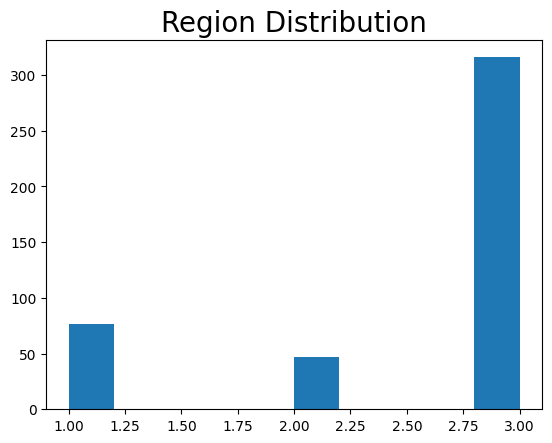

In [11]:
plt.hist(data['Region'])
plt.title('Region Distribution', fontsize=20)

plt.show
plt.savefig('images/region_distribution.png')

***Insights:*** From this historgram it can be insighted that most customers come from other regions compared to Lisnon and Oporto.

##### ***Box Plot***

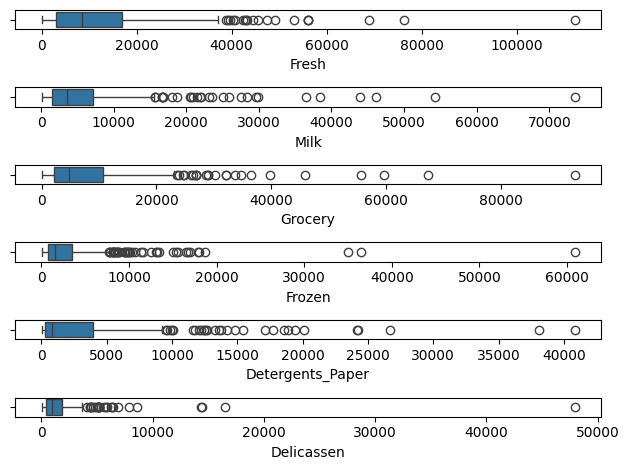

In [12]:
fig, ax = plt.subplots(6)

sns.boxplot(ax=ax[0], x=data['Fresh'])
sns.boxplot(ax=ax[1], x=data['Milk'])
sns.boxplot(ax=ax[2], x=data['Grocery'])
sns.boxplot(ax=ax[3], x=data['Frozen'])
sns.boxplot(ax=ax[4], x=data['Detergents_Paper'])
sns.boxplot(ax=ax[5], x=data['Delicassen'])

plt.tight_layout()

plt.savefig('images/boxplots.png')
plt.show()

***Insights:*** The boxplot helps to explain how the data is distributed and show outliers. It can be seen there are multiple extreme outliers in each of the features that is causing the data to be heavily skewed. Only the very extreme outliers will be removed in order to preserve some of the variation of the raw data. It also helps reinforce that majority of the data is within the lower price. 

##### ***Outlier Removal***

In [13]:
data = data[data['Fresh'] < 100000]
data = data[data['Milk'] < 70000]
data = data[data['Grocery'] < 80000]
data = data[data['Frozen'] < 30000]
data = data[data['Detergents_Paper'] < 35000]
data = data[data['Delicassen'] < 40000]

##### ***Scaling Data***

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


# Re-adding Column names to Dataframe
final_data = pd.DataFrame(scaled_data, columns=data.columns)


In [15]:
final_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.454341,0.591341,0.088322,0.714307,0.006195,-0.782904,-0.002583,-0.029430
1,1.454341,0.591341,-0.392698,0.740070,0.256043,-0.309153,0.151753,0.227463
2,1.454341,0.591341,-0.453039,0.572442,0.021507,-0.112369,0.207354,3.786428
3,-0.687597,0.591341,0.139407,-0.700995,-0.409595,1.111489,-0.542885,0.234501
4,1.454341,0.591341,0.940821,0.003979,-0.038994,0.349753,-0.226234,2.226888


# **PCA**

In [16]:
pca = PCA()

pca_data = pca.fit(final_data)

##### ***Graphing Variance Ratio***

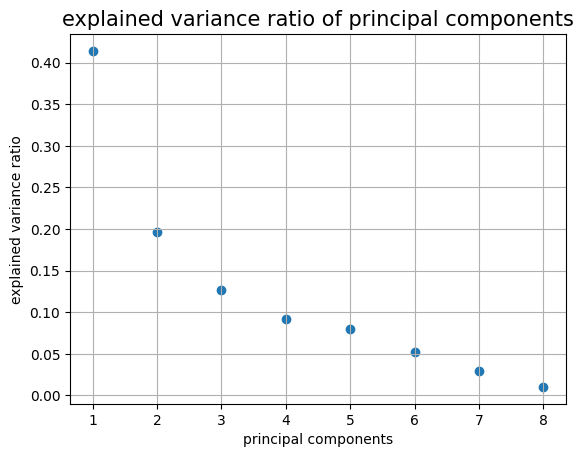

In [17]:
# Plots the variance ratio for each principal component

plt.scatter(x=[i+1 for i in range(len(pca_data.explained_variance_ratio_))],
            y=pca_data.explained_variance_ratio_)
plt.grid(True)
plt.title('explained variance ratio of principal components', fontsize=15)
plt.xlabel('principal components')
plt.ylabel('explained variance ratio')

plt.savefig('images/explained_variance_ratio_pca.png')
plt.show()

***Insights:*** From the graph we can visually that `PC1` explains over 40% of the variance of the data. While `PC2` only explains a bit under 20%. Together they explain about 60% of the variance of data. For the rest of the clustering, in order to visually see the clusters using visualizations, we will be using only the first 2 principal components despite it being 60%.

##### ***PC1 Weights***

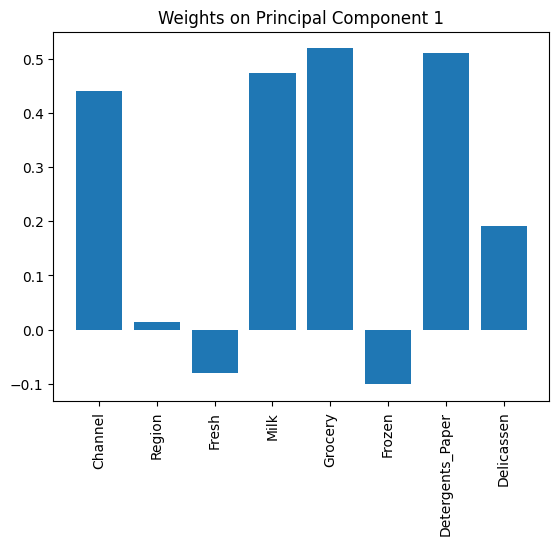

In [18]:
# Bar plot of weights on principal component

components = pca.components_
features = final_data.columns

plt.bar(features, components[0])
plt.xticks(rotation='vertical')
plt.title('Weights on Principal Component 1')

plt.show
plt.savefig('images/pc1_weights.png')

***Insights:*** This bar graph on `PC1` weights shows that `Channel`, `Milk`, `Grocery` and `Detergents_Paper` have a high contribution compared to the other features.

##### ***PC2 Weights***

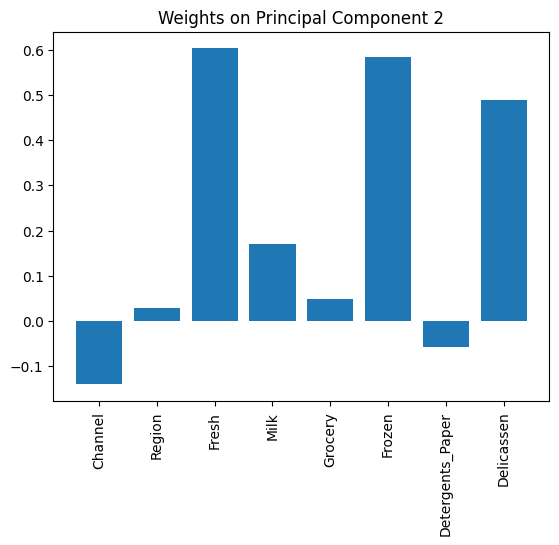

In [19]:
# Bar plot of weights on principal component

plt.bar(features, components[1])
plt.xticks(rotation='vertical')
plt.title('Weights on Principal Component 2')

plt.show
plt.savefig('images/pc2_weights.png')

***Insights:*** This bar graph on `PC2` weights shows that `Fresh`, `Frozen` and `Delicassen` have a high contribution compared to the other features. These high contribution features are different than the ones in `PC1`.

##### ***Using PCA as the final data***

In [20]:
final_data_transformed = pca.transform(final_data)
final_data = pd.DataFrame(final_data_transformed)
final_data = final_data.iloc[:, :2] # keeping only first 2 principal components

In [21]:
final_data.head()

,0,1
0,1.055606,-0.484416
1,1.315469,-0.364133
2,1.804807,1.412140
3,-1.194405,0.854937
4,0.827832,1.685264


# **KMeans Clustering**

##### ***Elbow Rule***

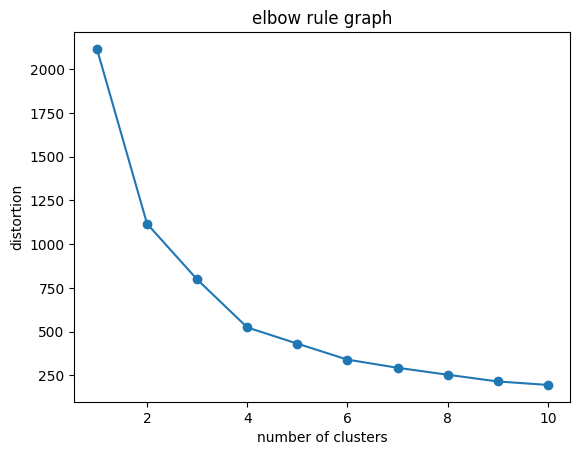

In [22]:
def plot_distortion(data, max_clusters=10): # Plots the distortions the amount of clusters given
    distortions = []
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=42)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('number of clusters')
    plt.ylabel('distortion')
    plt.title('elbow rule graph')
    plt.show

plot_distortion(final_data)

plt.savefig('images/elbow_rule.png')

***Insights:*** This graph shows the distortion compared to the number of the clusters. From this graph we can see that `4` is the right amount of clusters using the elbow rule.

##### ***Fit KMeans Clustering***

In [23]:
km = KMeans(n_clusters=4,
            n_init = 10,
            random_state=42)

y_km = km.fit_predict(final_data)

##### ***Plotting Clusters***

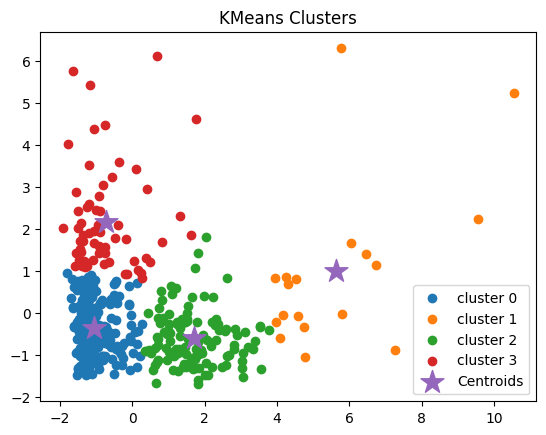

In [24]:
def plot_clusters(data, y_res): # plots the clusters along with the centroid
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = data[y_res == cluster, 0]
        y = data[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x, y, label=f'cluster {cluster}')

    plt.scatter(X_centroids, Y_centroids, marker='*', s=300, label='Centroids')
    plt.title('KMeans Clusters')
    plt.legend()

    plt.savefig('images/kmeans_clusters.png')
    plt.show()

X = final_data.to_numpy()
plot_clusters(X, y_km)

***Insights:*** The graph of the clusters using KMeans shows 4 distinct clusters. It does a good job in grouping the highly concentrated points together, while the more separated data points are their own cluster.

# **Hierarchical Clustering**

##### ***Dendrogram***

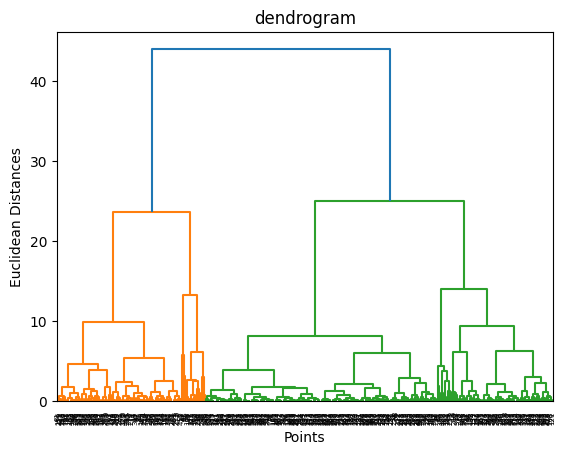

In [25]:
def plot_dendrogram(data, method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(data, method=method))
    plt.title('dendrogram')
    plt.ylabel('Euclidean Distances')
    plt.xlabel('Points')

plot_dendrogram(final_data)

plt.savefig('images/dendrogram.png')

***Insights:*** The dendrogram helps to determine the best number of clusters to be using. From this we can see that four clusters will also be the best amount of clusters for hierarchical clustering.

##### ***Fit Hierarchial Clustering***

In [26]:
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters=4)

y_hc = ac.fit_predict(final_data)

##### ***Plot Clusters***

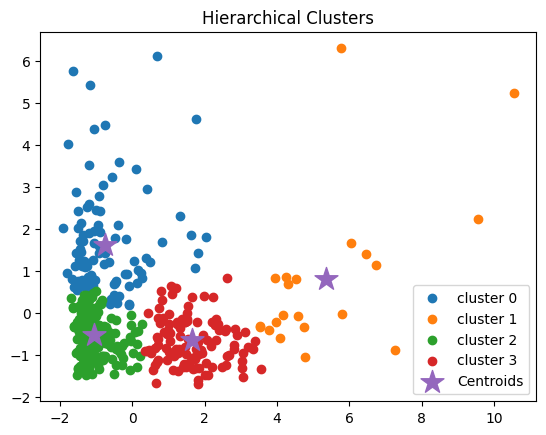

In [27]:
def plot_clusters(data, y_res): # plots the clusters along with the centroid
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = data[y_res == cluster, 0]
        y = data[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x, y, label=f'cluster {cluster}')

    plt.scatter(X_centroids, Y_centroids, marker='*', s=300, label='Centroids')
    plt.title('Hierarchical Clusters')
    plt.legend()

    plt.savefig('images/hierarchical_clusters.png')
    plt.show()

X = final_data.to_numpy()
plot_clusters(X, y_hc)

***Insights:*** The graph of the clusters using hierarchical clustering shows 4 distinct clusters. It is similar to KMeans clustering, with minor differences here and there. Overall it does a good job in clustering the data into 4 distinct groups. 

# **Conclusion**

##### ***Findings***

- There is a high correlation between the `Grocery` and `Detergents_Paper`
- Most of the data is right skewed indicating that most customers spend less money on this Wholesale Distrubtor than more.
- The best two principal components only show about 60% of the variance of data. For better variance of the entire dataset, more principal components could be used.
- Four clusters was the best amount of clusters for both KMeans and Hierarchical clustering.

##### ***What could this data be used for?***
- Help understand different groups of customers base
- Recognize patterns of products between customers
- Make marketing decisions to promote to these specific different groups